<p style="text-align:right">This lesson was taken from: <a href="http://www.cristiandima.com/neural-networks-from-scratch-in-python/" >Cristian Dima's Neural Network from Scratch</a></p>
<img style="" src="https://durhamcollege.ca/wp-content/uploads/ai-hub-header.jpg" alt="DC Logo"/>

# LESSON 15
## <span style="color: #27ae60"> A Neural Network from Scratch - The Implementation</span>

**We are going to give our neural network data points belonging to three classes. We would like our network to figure out which point belongs to which class.**

First, let's generate some data we can visualize:

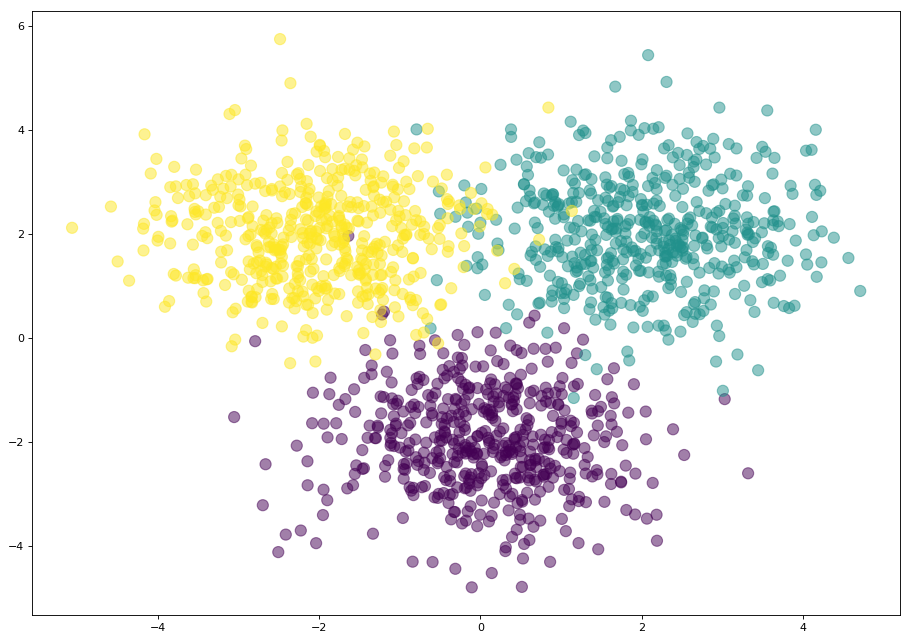

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

np.random.seed(1)

# generate three Gaussian clouds each holding 500 points
# hint: you can think of these are the data we will be using to train and test our model
# if we ever create a neural network to use in production, this will obviously be real data instead.
X1 = np.random.randn(500, 2) + np.array([0, -2])
X2 = np.random.randn(500, 2) + np.array([2, 2])
X3 = np.random.randn(500, 2) + np.array([-2, 2])

# put them all in a big matrix
X = np.vstack([X1, X2, X3])

# generate the one-hot-encodings
# remember: these labels will be the corresponding classes to the data we generated above.
labels = np.array([0]*500 + [1]*500 + [2]*500)
T = np.zeros((1500, 3))
for i in range(1500):
    T[i, labels[i]] = 1

# visualize the data
plt.scatter(X[:,0], X[:,1], c=labels, s=100, alpha=0.5)
plt.show()

# <span style="color: #c0392b">Stop for a sec!</span>

There's a lot of code above. Take a few minutes and observe each line to make sure you understand it. Print the first 5 lines of the *X* matrix and the *labels* matrix. Paste the output here.

<br/><br/>
<hr/>
<br/><br/>

Now, we're going to start transcribing the formulas in the previous lesson to Python, we get the following neural network:

In [17]:
# sigmoid function from previous lesson
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# softmax function from previous lesson
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

samples = X.shape[0] # 1500 samples
features = X.shape[1] # 2 features
hidden_nodes = 5
classes = 3

# randomly initialize weights
W1 = np.random.randn(features, hidden_nodes)
b1 = np.random.randn(hidden_nodes)
W2 = np.random.randn(hidden_nodes, classes)
b2 = np.random.randn(classes)

alpha = 10e-6
costs = []
for epoch in range(10000):
    # forward pass
    A = sigmoid(X.dot(W1) + b1) # A = sigma(Z)
    Y = softmax(A.dot(W2) + b2) # Y = softmax(Z2)

    # backward pass
    delta2 = Y - T
    delta1 = (delta2).dot(W2.T) * A * (1 - A)

    W2 -= alpha * A.T.dot(delta2)
    b2 -= alpha * (delta2).sum(axis=0)

    W1 -= alpha * X.T.dot(delta1)
    b1 -= alpha * (delta1).sum(axis=0)

    # print loss function values across training iterations
    if epoch % 1000 == 0:
        loss = np.sum(-T * np.log(Y))
        print('Loss function value after pass {}: {}'.format(epoch, loss))
    # save loss function values across training iterations
    if epoch % 100 == 0:
        loss = np.sum(-T * np.log(Y))
        costs.append(loss)

Loss function value after pass 0: 2008.476592130491
Loss function value after pass 1000: 502.7381282911801
Loss function value after pass 2000: 259.09331414027565
Loss function value after pass 3000: 195.02362699451493
Loss function value after pass 4000: 167.40685112005715
Loss function value after pass 5000: 152.37451682736344
Loss function value after pass 6000: 143.08002236822344
Loss function value after pass 7000: 136.8451747794457
Loss function value after pass 8000: 132.41529154853322
Loss function value after pass 9000: 129.1289502890624


# <span style="color: #2980b9">Holy smokes we did it - it actually works!</span>

observe the output of the above, we can see that our loss indeed decreases over time, which is the goal! Remember, we want to make it so that our network gets smarter over time, which means it makes less errors. Let's take a look at how the loss decreased over time by graphing it below:

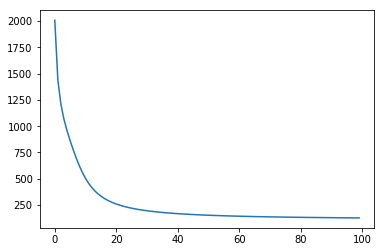

In [18]:
plt.plot(costs)
plt.show()

<br/><br/>
<hr/>
<br/><br/>

# <span style="color: #2980b9">A few closing remarks!</span>

The neural network that was created is only 3 layers (input, 1 hidden, output). One thing to note is that this kind of architecture is almost never used in real life as it is not capable of modelling more complicated, dense problems. For our toy example, it is okay, but you will see neural networks with more than 1 hidden layer and 5 hidden layer nodes. 

The neural network also doesn't have a test function, which every Machine Learning model does have. This function is used to test new values in the future. 

<br/><br/>
<hr/>
<br/><br/>

# <span style="color: #8e44ad">Challenge →</span>

1. Create a new Jupyter Notebook file and implement the same Neural Network we created above.

2. Modify this Neural Network to be within a Python Class. This is so you can instantiate this Neural Network whenever you'd like.

    * The class should have a train function which is essentially the code given above. It should take an epoch paramater which is the number of epochs the network will train for (it is 10,000 in the example above). 
    * The class should have a test function, which will run an example through the network and give an output. Remember, the testing of the function is just the forward pass of the network. You will have to code some logic to give you a digestable output that makes sense. 
    * The neural network should take a parameter upon instantiation that dictates the number of hidden layers. This portion of the challenge will require the most thought and work. Feel free to work with partners on this part as it is very important you understand how this is done. 

<br/><br/>
<hr/>
<br/><br/>

**Hint:** Adding multiple layers to the network will be tough. Just remember that your input layer goes to your hidden layer and your hidden layer goes to your output layer. You will have to inject the capability to modularly make more layers using lists of values. All the math for these layers can be reused from the code above.

**Hint:** Draw out your architecture on a piece of paper to visualize it before actually jumping into it. This will help.

**Hint:** You can verify your network is working properly by training it and observing that your loss is indeed going down instead of up.